<a href="https://colab.research.google.com/github/UvanShankar/dogXception/blob/master/dogXceptioncreatemodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/udacity/dog-project.git
%cd dog-project

Cloning into 'dog-project'...
remote: Enumerating objects: 243, done.
remote: Total 243 (delta 0), reused 0 (delta 0), pack-reused 243
Receiving objects: 100% (243/243), 55.14 MiB | 9.84 MiB/s, done.
Resolving deltas: 100% (115/115), done.
/content/dog-project/dog-project


In [2]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages

--2019-10-01 07:58:58--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.116.176
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.116.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  20.8MB/s    in 54s     

2019-10-01 07:59:52 (20.2 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [8]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = np_utils.to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

# load train, test, and validation datasets
train_files, train_targets = load_dataset('/content/dog-project/dogImages/train')
valid_files, valid_targets = load_dataset('/content/dog-project/dogImages/valid')
test_files, test_targets = load_dataset('/content/dog-project/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("/content/dog-project/dogImages/train/*/"))]

# print statistics about the dataset
print('There are %d total dog categories.' % len(dog_names))
print('There are %s total dog images.\n' % len(np.hstack([train_files, valid_files, test_files])))
print('There are %d training dog images.' % len(train_files))
print('There are %d validation dog images.' % len(valid_files))
print('There are %d test dog images.'% len(test_files))

There are 133 total dog categories.
There are 8351 total dog images.

There are 6680 training dog images.
There are 835 validation dog images.
There are 836 test dog images.


In [14]:
dog_names

['/dogImages/train/001.Affenpinscher',
 '/dogImages/train/002.Afghan_hound',
 '/dogImages/train/003.Airedale_terrier',
 '/dogImages/train/004.Akita',
 '/dogImages/train/005.Alaskan_malamute',
 '/dogImages/train/006.American_eskimo_dog',
 '/dogImages/train/007.American_foxhound',
 '/dogImages/train/008.American_staffordshire_terrier',
 '/dogImages/train/009.American_water_spaniel',
 '/dogImages/train/010.Anatolian_shepherd_dog',
 '/dogImages/train/011.Australian_cattle_dog',
 '/dogImages/train/012.Australian_shepherd',
 '/dogImages/train/013.Australian_terrier',
 '/dogImages/train/014.Basenji',
 '/dogImages/train/015.Basset_hound',
 '/dogImages/train/016.Beagle',
 '/dogImages/train/017.Bearded_collie',
 '/dogImages/train/018.Beauceron',
 '/dogImages/train/019.Bedlington_terrier',
 '/dogImages/train/020.Belgian_malinois',
 '/dogImages/train/021.Belgian_sheepdog',
 '/dogImages/train/022.Belgian_tervuren',
 '/dogImages/train/023.Bernese_mountain_dog',
 '/dogImages/train/024.Bichon_frise',


Number of faces detected: 0


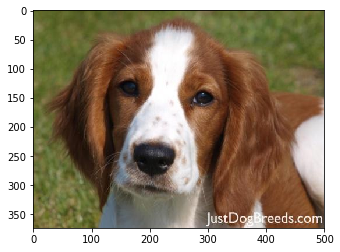

In [3]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('/content/dog-project/haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread("images/Welsh_springer_spaniel_08203.jpg")
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()




# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

In [4]:
#The path_to_tensor function below takes a string-valued file path 
#to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN

from keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

Using TensorFlow backend.


In [5]:
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz

--2019-10-01 08:00:37--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.20.1
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.20.1|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3352158914 (3.1G) [application/x-www-form-urlencoded]
Saving to: ‘DogXceptionData.npz’

DogXceptionData.npz 100%[===================>]   3.12G  20.7MB/s    in 2m 34s  

2019-10-01 08:03:12 (20.7 MB/s) - ‘DogXceptionData.npz’ saved [3352158914/3352158914]



In [9]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential
import numpy as np
from keras.callbacks import ModelCheckpoint


### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('/content/dog-project/DogXceptionData.npz')
train_Xception = bottleneck_features['train']
valid_Xception = bottleneck_features['valid']
test_Xception = bottleneck_features['test']

Xception_model = Sequential()
Xception_model.add(GlobalAveragePooling2D(input_shape=train_Xception.shape[1:]))
Xception_model.add(Dense(133, activation='softmax'))

Xception_model.summary()


Xception_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
### Compile the model

checkpointer = ModelCheckpoint(filepath='/content/dog-project/weights.best.Xception.hdf5', 
                               verbose=1, save_best_only=True)

Xception_model.fit(train_Xception, train_targets, 
          validation_data=(valid_Xception, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)
### Train the model.

Xception_model.load_weights('/content/dog-project/weights.best.Xception.hdf5')
### Load the model weights with the best validation loss.VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 7s 1ms/step - loss: 1.0531 - acc: 0.7334 - val_loss: 0.5478 - val_acc: 0.8156

Epoch 00001: val_loss improved from inf to 0.54783, saving model to /content/dog-project/weights.best.Xception.hdf5
Epoch 2/20
6680/6680 [==============================] - 3s 396us/step - loss: 0.3975 - acc: 0.8740 - val_loss: 0.5221

In [10]:
# get index of predicted dog breed for each image in test set
Xception_predictions = [np.argmax(Xception_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Xception]

# report test accuracy
test_accuracy = 100*np.sum(np.array(Xception_predictions)==np.argmax(test_targets, axis=1))/len(Xception_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)



Test accuracy: 86.3636%


In [0]:
#Xception_model.save("Xception_model_dog.h5")
from google.colab import files
files.download("/content/dog-project/haarcascades/haarcascade_frontalface_alt.xml")



83689472/83683744 [==============================] - 8s 0us/step
This image looks like a Welsh_springer_spaniel.


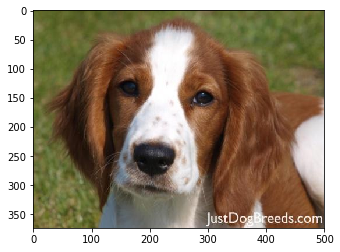

In [11]:
def extract_Xception(tensor):
	from keras.applications.xception import Xception, preprocess_input
	return Xception(weights='imagenet', include_top=False).predict(preprocess_input(tensor))
### A function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
img_path = 'images/Welsh_springer_spaniel_08203.jpg'
#img_path = dog_files_short[2]
def classify_dog_breed(img_path):
    img = path_to_tensor(img_path)
    predictions = Xception_model.predict(extract_Xception(img))
    prediction = np.argmax(predictions)
    dog_names[prediction].split('.')[-1]
    print('This image looks like a {}.'.format(dog_names[prediction].split('.')[-1]))
    return dog_names[prediction].split('.')[-1]
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
prediction = classify_dog_breed(img_path)